In [3]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

sc.settings.set_figure_params(dpi=80)


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [52]:
#--- read .h5ad object before correction
adata_Scrub = sc.read('./H5AD/pSLEvsHD_Scrub_BC_042519.h5ad')

AnnData object with n_obs × n_vars = 258868 × 1205 
    obs: 'n_genes', 'total_features_by_counts', 'log1p_total_features_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_features', 'pct_counts_in_top_100_features', 'pct_counts_in_top_200_features', 'pct_counts_in_top_500_features', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_counts', 'louvain'
    var: 'gene_ids', 'n_cells', 'mito', 'mean_counts', 'log1p_mean_counts', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [9]:
#--- read metadata (cell information)

Meta = pd.read_csv('./Meta/pSLE_Scrub_MetaI.csv', index_col=0)
Meta.head(4)

,Samples,louvain,IDs,Age,Names,Groups,Gender,Eth_Race,SLEDAI,SLEDAI_1,Batches
AAACCTGAGAGCCCAA-1,1,15,JB17001,17,SLE309,SLE,F,NH_As,0,0 to 3,B1
AAACCTGAGCAGGCTA-1,1,5,JB17001,17,SLE309,SLE,F,NH_As,0,0 to 3,B1
AAACCTGCACATAACC-1,1,4,JB17001,17,SLE309,SLE,F,NH_As,0,0 to 3,B1
AAACCTGCAGAGTGTG-1,1,6,JB17001,17,SLE309,SLE,F,NH_As,0,0 to 3,B1


In [12]:

#---- Add meta Data to H5ad object 

adata_Scrub.obs['IDs']= Meta['IDs']
adata_Scrub.obs['Age']= Meta['Age']
adata_Scrub.obs['Names']= Meta['Names']
adata_Scrub.obs['Groups']= Meta['Groups']
adata_Scrub.obs['Samples']= Meta['Samples']
adata_Scrub.obs['Gender']= Meta['Gender']
adata_Scrub.obs['Batches']= Meta['Batches']
adata_Scrub.obs['Eth_Race']= Meta['Eth_Race']
adata_Scrub.obs['SLEDAI']= Meta['SLEDAI_1']
adata_Scrub.obs['SLEDAI_1']= Meta['SLEDAI']

adata_Scrub.obs.head(5)


,n_genes,total_features_by_counts,log1p_total_features_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_features,pct_counts_in_top_100_features,pct_counts_in_top_200_features,pct_counts_in_top_500_features,total_counts_mito,...,IDs,Age,Names,Groups,Samples,Gender,Batches,Eth_Race,SLEDAI,SLEDAI_1
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAGCCCAA-1,703,703,6.556778,1534.0,7.336286,40.156454,53.976532,67.209909,86.766623,26.0,...,JB17001,17,SLE309,SLE,1,F,B1,NH_As,0 to 3,0
AAACCTGAGCAGGCTA-1,940,940,6.846943,2037.0,7.619724,36.524300,48.600884,60.726559,78.399607,39.0,...,JB17001,17,SLE309,SLE,1,F,B1,NH_As,0 to 3,0
AAACCTGCACATAACC-1,1194,1194,7.085901,3234.0,8.081784,36.332715,49.690785,62.677798,78.540507,102.0,...,JB17001,17,SLE309,SLE,1,F,B1,NH_As,0 to 3,0
AAACCTGCAGAGTGTG-1,842,842,6.736967,2070.0,7.635787,44.251208,55.700483,67.149758,83.478261,56.0,...,JB17001,17,SLE309,SLE,1,F,B1,NH_As,0 to 3,0
AAACCTGCATATGGTC-1,668,668,6.505784,1249.0,7.130899,36.909528,49.079263,62.530024,86.549239,59.0,...,JB17001,17,SLE309,SLE,1,F,B1,NH_As,0 to 3,0


In [13]:
adata_Scrub.write('./H5AD/pSLEvsHD_Scrub_BC_042519.h5ad')

... storing 'IDs' as categorical
... storing 'Names' as categorical
... storing 'Groups' as categorical
... storing 'Gender' as categorical
... storing 'Batches' as categorical
... storing 'Eth_Race' as categorical
... storing 'SLEDAI' as categorical
... storing 'SLEDAI_1' as categorical


In [17]:
#---------------------------------- BBKNN batch correction

#- https://github.com/Teichlab/bbknn

import bbknn
#--- bbkkn batch correction --> 10X batches 
corrected = bbknn.bbknn(adata_Scrub, 
                        copy=True, 
                        batch_key="Batches", 
                        metric="angular", 
                        approx=True,
                        save_knn=True, 
                        neighbors_within_batch=5, 
                        n_pcs=20, 
                        trim=50)



computing batch balanced neighbors
    finished (0:02:49.62) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [ ]:
#--- runing UMAP on corrected data 

sc.tl.umap(corrected, min_dist=0.3,n_components=3)


computing UMAP


In [ ]:
#--- louvain clustering on corrected data

sc.tl.louvain(corrected, resolution=1.2) #default , resolution = 1


... storing 'IDs' as categorical
... storing 'Names' as categorical
... storing 'Groups' as categorical
... storing 'Gender' as categorical
... storing 'Batches' as categorical
... storing 'Eth_Race' as categorical
... storing 'SLEDAI' as categorical


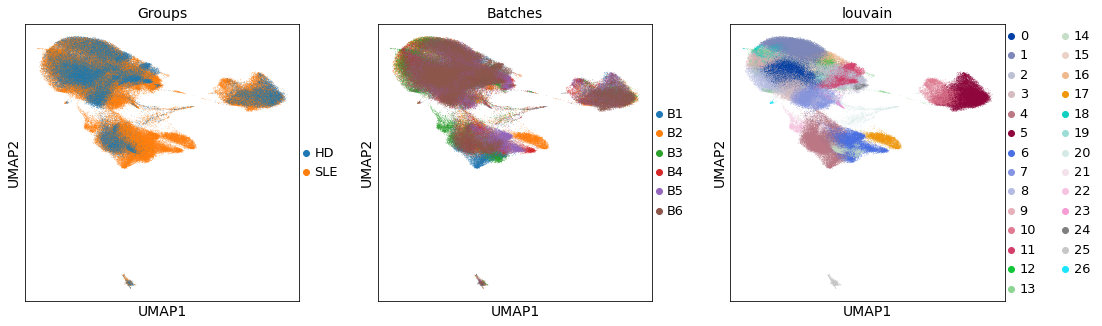

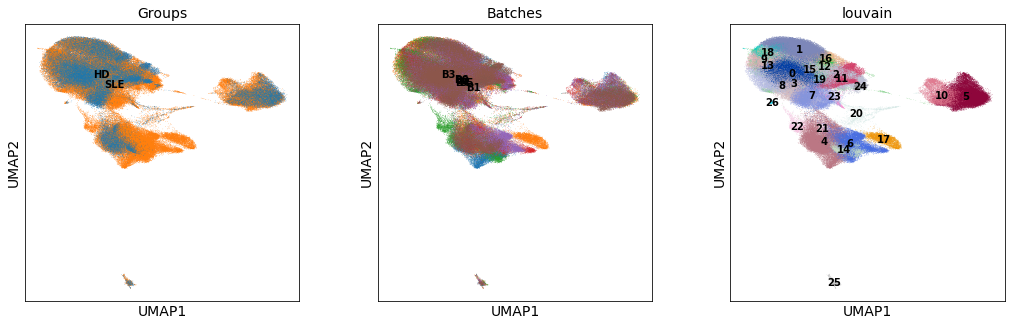

... storing 'IDs' as categorical
... storing 'Names' as categorical
... storing 'Groups' as categorical
... storing 'Gender' as categorical
... storing 'Batches' as categorical
... storing 'Eth_Race' as categorical
... storing 'SLEDAI' as categorical


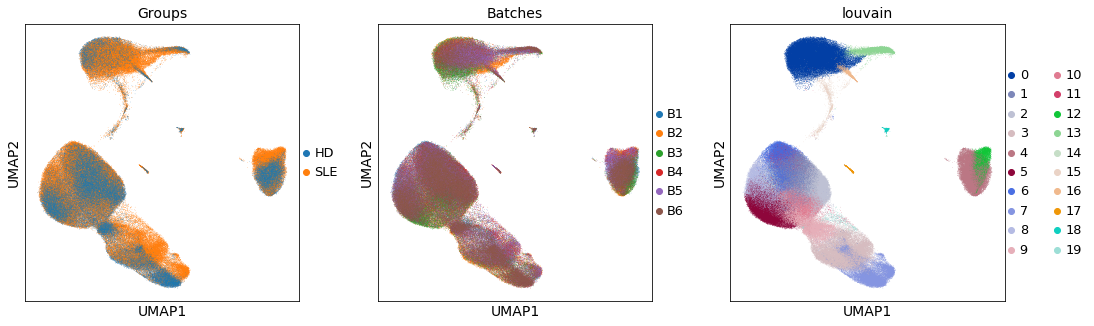

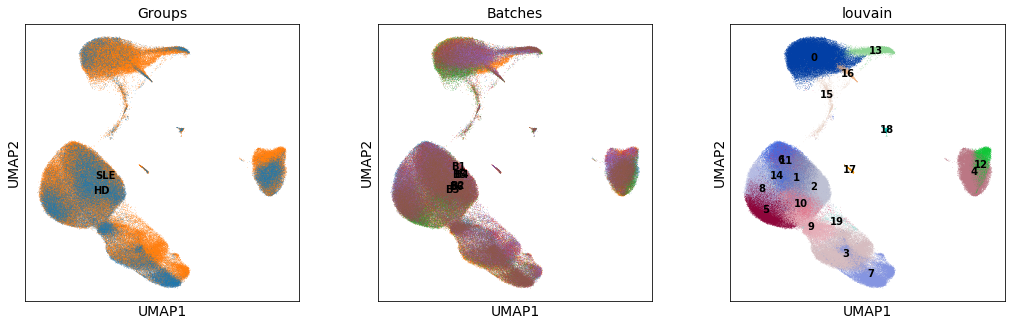

In [59]:
#-------- UMAP PLOTS before / after BBKNN correction

#-- Before correction 
rcParams['figure.figsize'] = (5,5)
sc.pl.umap(adata_Scrub, color=['Groups', 'Batches','louvain'],components='1,2', edgecolor='none', size=1, show=True, linewidths=10)
sc.pl.umap(adata_Scrub, color=['Groups', 'Batches','louvain'],components='1,2', edgecolor='none', size=1, show=True, linewidths=10,legend_loc='on data')

#-- After correction 
rcParams['figure.figsize'] = (5,5)
sc.pl.umap(corrected, color=['Groups', 'Batches','louvain'], edgecolor='none', size=1, linewidths=10)
sc.pl.umap(corrected, color=['Groups', 'Batches','louvain'], edgecolor='none', size=1, linewidths=10,legend_loc='on data')

#-- sava corrected data 
corrected.write(results_file2)



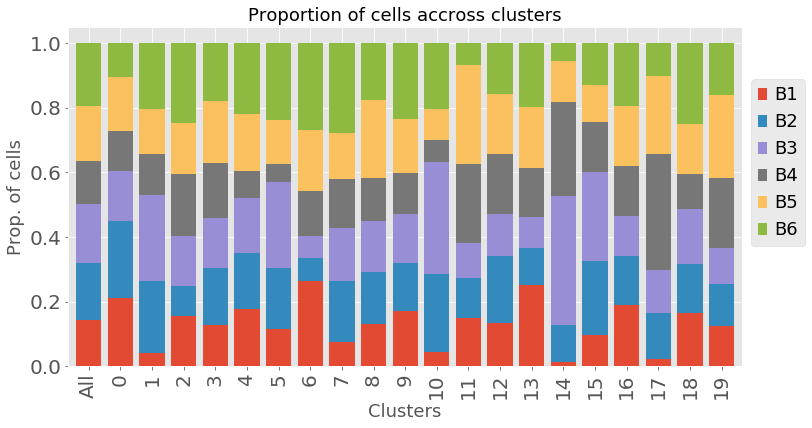

In [5]:
#-- Calculate proportion SLE vs. HD within each cluster

Groups_tab = pd.crosstab(index=corrected.obs['louvain'],  # Make a crosstab
                        columns=corrected.obs['Batches'], margins=True)               # Name the count column


#-- change index and columns order
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')   

MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=True, 
            linewidth=1, 
            width=0.8, fontsize=20)
plt.title("Proportion of cells accross clusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

#plt.gca().get_legend().remove() #remove legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), fontsize=18)
plt.show()


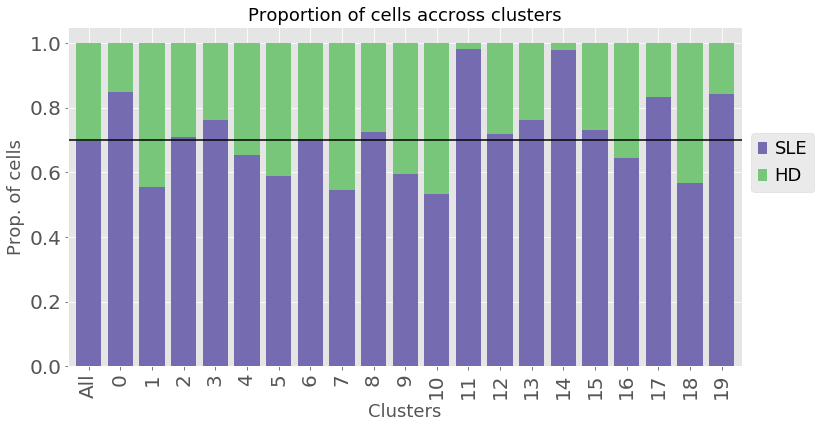

In [60]:
#-- Calculate proportion SLE vs. HD within each cluster

Groups_tab = pd.crosstab(index=corrected.obs['louvain'],  # Make a crosstab
                        columns=corrected.obs['Groups'], margins=True)               # Name the count column


#-- change index and columns order
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])
Groups_tab = Groups_tab[['SLE','HD','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')   
#colors
Col_Group =["#756bb1","#78c679"] 


MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=True, 
            linewidth=1, 
            width=0.8, fontsize=20, color=Col_Group)
plt.title("Proportion of cells accross clusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.axhline(y=0.7, color='Black', linestyle='-')
#plt.gca().get_legend().remove() #remove legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), fontsize=18)
plt.show()


In [19]:
#-- create a new meta data column (clusters)
corrected.obs['clusters']=corrected.obs['louvain']

In [6]:
#---- rename the clusters 

new_cluster_names = ["C0_CD14_mono",
                     "C1_CD4_T",
                     "C2_CD4_T",
                     "C3_GzH_acCD8_T",
                     "C4_B",
                     "C5_CD8_T",
                     "C6_CD4_T",
                     "C7_CD16_NK",
                     "C8_CD8_T",
                     "C9_GzK_acCD8_T",
                     "C10_CD4_T",
                     "C11_CD4_T",
                     "C12_B",
                     "C13_CD16_mono",
                     "C14_Eryth",
                     "C15_Mgk",
                     "C16_DCs",
                     "C17_PCs",
                     "C18_pDCs",
                     "C19_ISGhi_GzK_acCD8_T"]

corrected.rename_categories('clusters', new_cluster_names)



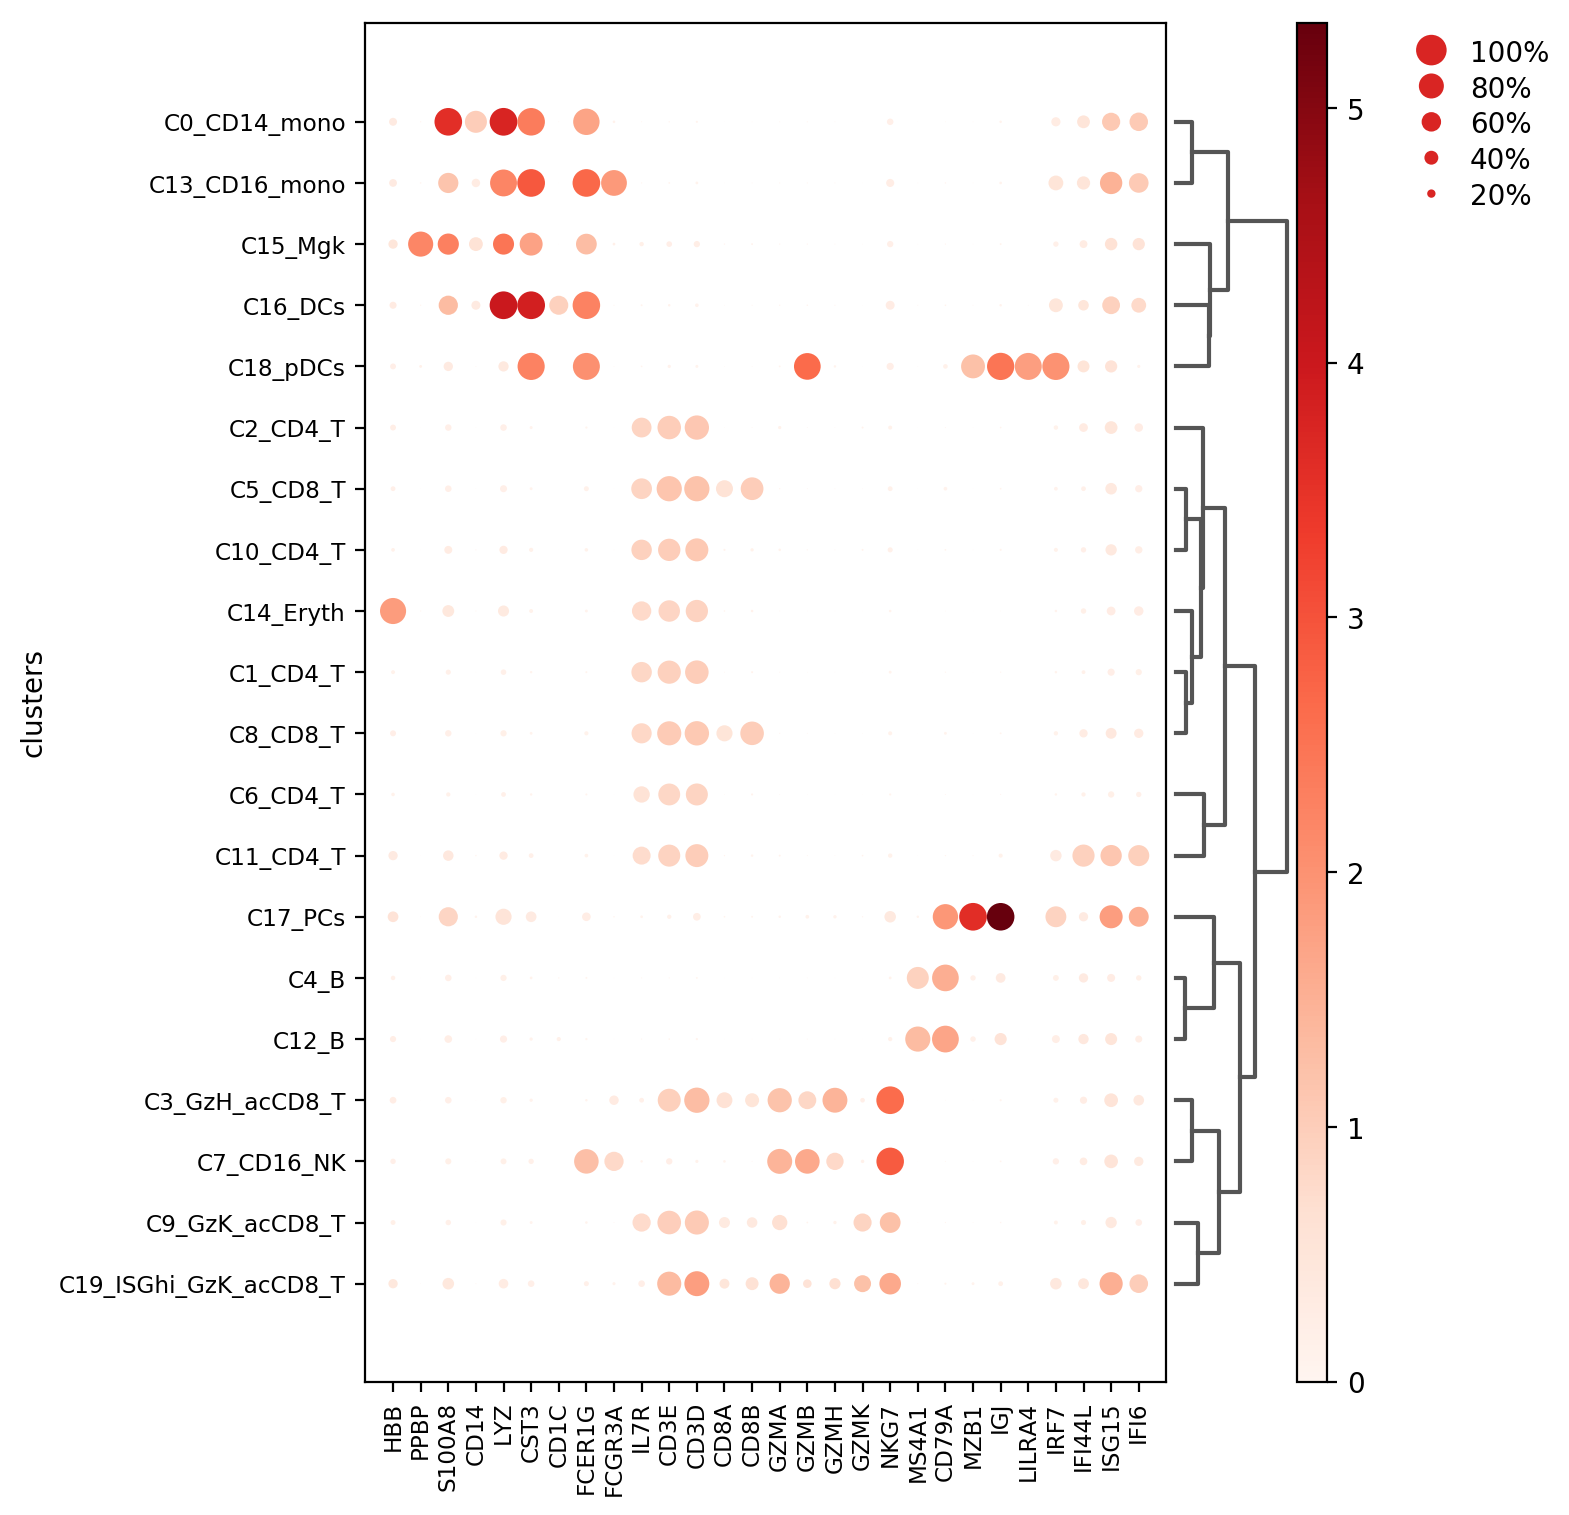

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[5.25, 0.8, 0.2, 0.5, 0.25])

In [8]:
#--- Figure. 1c

sc.settings.set_figure_params(dpi=300)  # set sufficiently high resolution for saving

Genes =["HBB", "PPBP","S100A8","CD14","LYZ","CST3",'CD1C',"FCER1G","FCGR3A","IL7R","CD3E","CD3D","CD8A","CD8B", 
       "GZMA","GZMB","GZMH","GZMK", "NKG7", "MS4A1", "CD79A", "MZB1","IGJ",'LILRA4',"IRF7",'IFI44L','ISG15','IFI6']
matplotlib.style.use('default') 


sc.pl.dotplot(corrected, 
              Genes, 
              'clusters', 
              dendrogram=True, 
              figsize=(7,9), save='_Fig1c.pdf') #, save='_Fig1c.pdf'


In [14]:
corrected.uns['clusters_colors']=['#e41a1c','#999999','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#7fcdbb','#cab2d6', 
                           "#060404", "#bdbdbd", "#addd8e","#dd1c77","#fed976", "#08519c","#7a0177", "#016450", "#df65b0"]

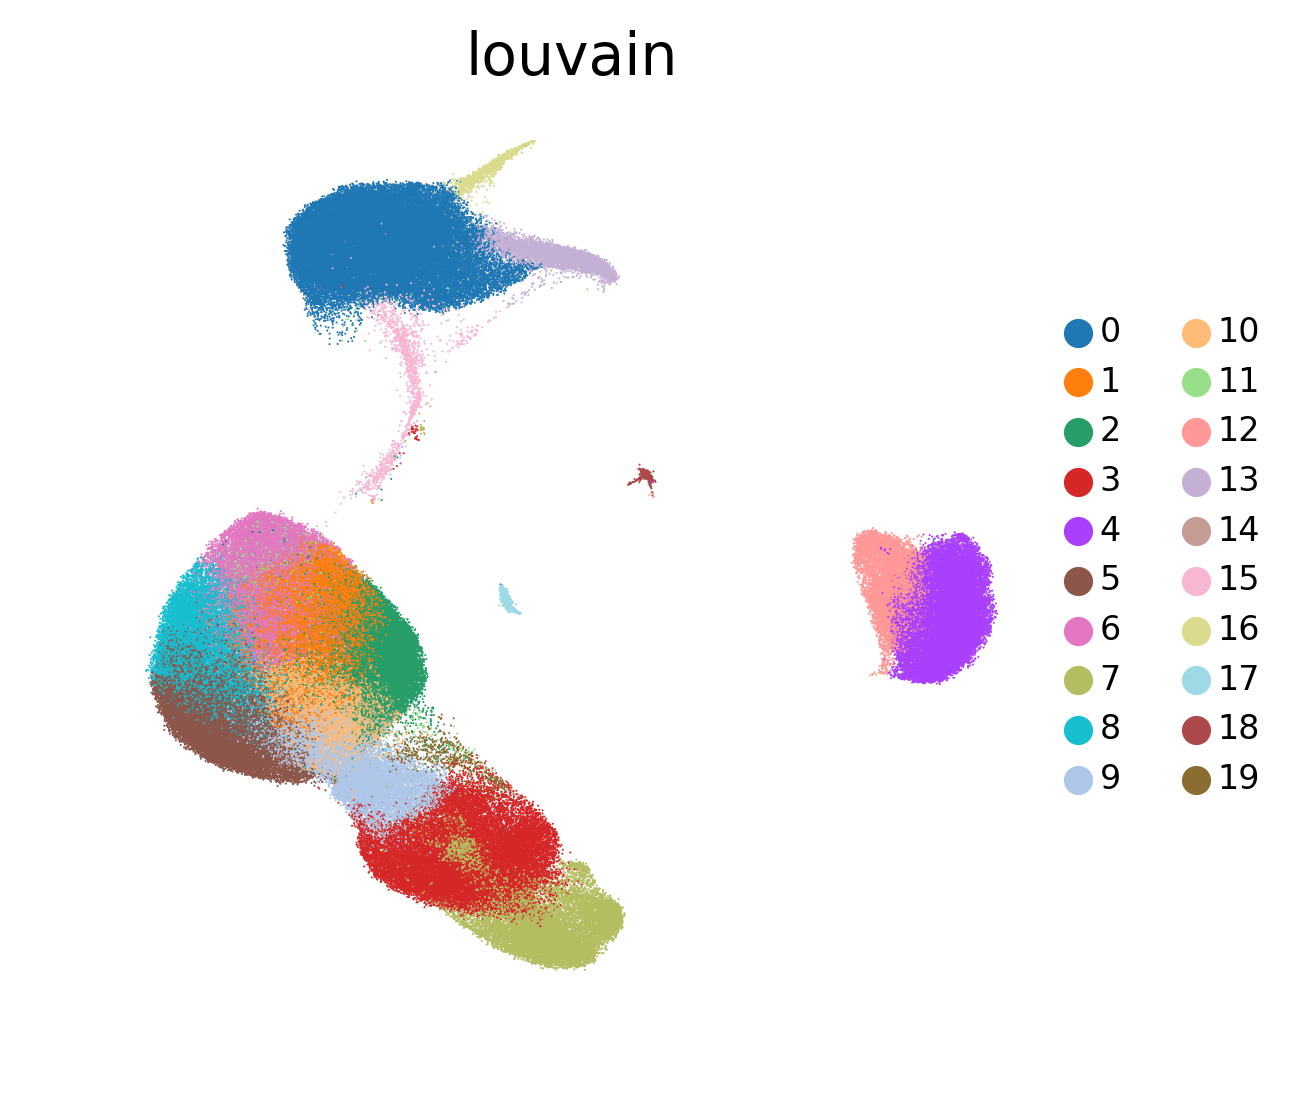

In [18]:
#--- Figure. 1b

plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
sc.settings.set_figure_params(dpi=150)  # set sufficiently high resolution for saving


rcParams['figure.figsize'] = (4,4)
genes=['louvain']

sc.pl.umap(corrected, 
           color=genes,
           size=1, 
           color_map='OrRd',
           ncols=4,
           frameon=False,
           #legend_loc='on data', 
           legend_fontsize=8) #, save='_pSLE_Fig.1b_labels1.pdf'


In [7]:
#-- save the h5ad object 
#corrected.write('./H5AD/pSLEvsHD_Scrub_AC_073019.h5ad')


In [2]:
#-- save the h5ad object 
corrected=sc.read('./H5AD/pSLEvsHD_Scrub_AC_073019.h5ad')
corrected

AnnData object with n_obs × n_vars = 258868 × 1205 
    obs: 'n_genes', 'total_features_by_counts', 'log1p_total_features_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_features', 'pct_counts_in_top_100_features', 'pct_counts_in_top_200_features', 'pct_counts_in_top_500_features', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_counts', 'louvain', 'clusters', 'IDs', 'Sample_ids', 'Age', 'Eth_Race', 'SLEDAI_1', 'Groups', 'Batches', 'SLEDAI', 'Names', 'DA', 'Subclusters', 'clusters_grp'
    var: 'gene_ids', 'n_cells', 'mito', 'mean_counts', 'log1p_mean_counts', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Batches_colors', 'Groups_colors', 'SLEDAI_colors', 'bbknn', 'clusters_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'